## Analysis of Rainfall in Brisbane - Australia

#### Source: [BOM Climate Data Online](http://www.bom.gov.au/climate/data/index.shtml?bookmark=136)
---

In [1]:
# import libraries for this question here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### 1. Objetive

The objective is to analyse the rainfall in Brisbane and compare with another Australian city. First, the analysis will try to identify significant periods of rainfall time in Brisbane to contrast with another Australian city from 2019 to 2021.

### 2. Data

In [2]:
# Import the data
data = pd.read_csv('Brisbane_Data.csv', )
data.head(3)


,Product code,Bureau of Meteorology station number,Year,Month,Day,Rainfall amount (millimetres),Period over which rainfall was measured (days),Quality
0,IDCJAC0009,40913,1999,1,1,NaN,NaN,NaN
1,IDCJAC0009,40913,1999,1,2,NaN,NaN,NaN
2,IDCJAC0009,40913,1999,1,3,NaN,NaN,NaN


In [3]:
# look the time period in years
data['Year'].unique()


array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022], dtype=int64)

**Clean/prepare the data for analysis**


In [4]:
# From our question, we need only the last three year (not 2022)
data = data[(data.Year >= 2019) & (data.Year < 2022)]
data.head(3)


,Product code,Bureau of Meteorology station number,Year,Month,Day,Rainfall amount (millimetres),Period over which rainfall was measured (days),Quality
7305,IDCJAC0009,40913,2019,1,1,0.0,1.0,N
7306,IDCJAC0009,40913,2019,1,2,0.0,1.0,N
7307,IDCJAC0009,40913,2019,1,3,8.4,1.0,N


In [5]:
# Dimensiones of dataset from 2019
num_rows = data.shape[0]
num_col = data.shape[1]
print('The dataset has ' + str( num_rows ) + ' rows and ' + str( num_col ) + ' columns!' )


The dataset has 1096 rows and 8 columns!


In [6]:
# We can look in missing values to improve our data quality
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1096 entries, 7305 to 8400
Data columns (total 8 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Product code                                    1096 non-null   object 
 1   Bureau of Meteorology station number            1096 non-null   int64  
 2   Year                                            1096 non-null   int64  
 3   Month                                           1096 non-null   int64  
 4   Day                                             1096 non-null   int64  
 5   Rainfall amount (millimetres)                   1064 non-null   float64
 6   Period over which rainfall was measured (days)  1064 non-null   float64
 7   Quality                                         1064 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 77.1+ KB


In [7]:
print("- Rainfall amount (millimetres) variable has " + str(data.shape[0] - data['Rainfall amount (millimetres)'].count()) 
      + " missing values which represents " + str(round((data.shape[0] - data['Rainfall amount (millimetres)'].count())/data.shape[0]*100,2)) + "%")


- Rainfall amount (millimetres) variable has 32 missing values which represents 2.92%


**Decision about missing values**

- 2.92% of missing values can be a minuscule representation of data, therefore, it could be dropped these empty values.
- However, in order to have bigger sample of data, it will be filled these fields using interpolation for numerical values.


In [8]:
# Interpolate Rainfall amount
data["Rainfall_amount_(millimetres)_Interpolate"] = data["Rainfall amount (millimetres)"]
data["Rainfall_amount_(millimetres)_Interpolate"].interpolate(method ='linear', inplace=True) 


In [9]:
# We can now see that the missing values are completed for the variables which will be analysed
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1096 entries, 7305 to 8400
Data columns (total 9 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Product code                                    1096 non-null   object 
 1   Bureau of Meteorology station number            1096 non-null   int64  
 2   Year                                            1096 non-null   int64  
 3   Month                                           1096 non-null   int64  
 4   Day                                             1096 non-null   int64  
 5   Rainfall amount (millimetres)                   1064 non-null   float64
 6   Period over which rainfall was measured (days)  1064 non-null   float64
 7   Quality                                         1064 non-null   object 
 8   Rainfall_amount_(millimetres)_Interpolate       1096 non-null   float64
dtypes: float64(3), int64(4), object(2)
memo

### 3. Analysis

In [10]:
# Taking only variables which will be analysed
# It has been identified the following variable to analyse:
variables = ["Year","Month","Day","Rainfall_amount_(millimetres)_Interpolate"]
data = data.filter(variables, axis=1)

num_rows = data.shape[0]
num_col = data.shape[1]
print('The dataset now has ' + str( num_rows ) + ' rows and ' + str( num_col ) + ' columns!' )


The dataset now has 1096 rows and 4 columns!


***Descriptive statistics***

It is important to look in the mean, median and standard deviation to know the distribution of the data

**What is the annual rainfall amount?**

In [11]:
data[['Year','Rainfall_amount_(millimetres)_Interpolate']].groupby('Year', sort=True).sum()


,Rainfall_amount_(millimetres)_Interpolate
Year,
2019,657.3
2020,1073.3
2021,1476.0


**Table1**: Rainfall by year and month (Brisbane)

In [12]:
data_pivot = data.reset_index().pivot_table(index='Month', columns='Year', values='Rainfall_amount_(millimetres)_Interpolate', aggfunc=np.sum)

# Add average per each year
column_names = [2019, 2020, 2021]
data_pivot['Average']= round(data_pivot[column_names].mean(axis=1),2)
data_pivot



Year,2019,2020,2021,Average
Month,,,,
1,27.9,165.6,86.6,93.37
2,38.0,365.8,144.2,182.67
3,181.0,62.8,300.6,181.47
4,42.6,6.3,112.2,53.70
5,25.4,12.2,89.8,42.47
6,43.6,41.6,26.4,37.20
7,14.4,59.4,51.2,41.67
8,3.2,19.4,8.8,10.47
9,8.8,5.8,10.8,8.47


In [13]:
descr = data_pivot.describe()
descr

# It is not interesting the average of min and max values because they were calculated selecting the month with lowest and highest values.
# Therefore, it will be only used max and min values by year (not average)
# In the next code will be calculated the final average which will be used for analysis

Year,2019,2020,2021,Average
count,12.000000,12.000000,12.000000,12.000000
mean,54.775000,89.441667,123.000000,89.074167
std,67.375287,106.697358,97.790128,67.457243
min,3.200000,5.800000,8.800000,8.470000
25%,13.200000,17.600000,45.000000,40.552500
50%,32.950000,50.500000,101.000000,73.535000
75%,46.450000,136.800000,176.700000,144.667500
max,207.800000,365.800000,300.600000,187.870000


**Table2**: Statistic Measurement by year (Brisbane)

In [14]:
# to take out the index from a dataframe
descr.reset_index(inplace=True)

# Interest in mean, standard deviation, minimum and maximum value
descr.drop([0,4,5,6], axis=0, inplace=True)

# Add average per each year
descr['Average']= descr[column_names].mean(axis=1)
descr

Year,index,2019,2020,2021,Average
1,mean,54.775000,89.441667,123.000000,89.072222
2,std,67.375287,106.697358,97.790128,90.620924
3,min,3.200000,5.800000,8.800000,5.933333
7,max,207.800000,365.800000,300.600000,291.400000


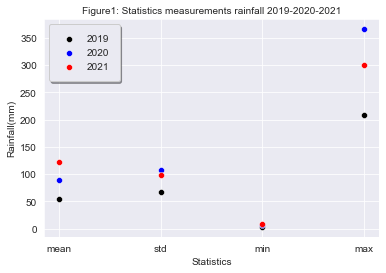

In [15]:
# visual representation of your descriptive statistics for the satifaction variable
sns.set_style("darkgrid")
sns.scatterplot( x="index" , y=2019, data=descr, color = 'black', label=2019 )
sns.scatterplot( x="index" , y=2020, data=descr, color = 'blue', label=2020)
sns.scatterplot( x="index" , y=2021, data=descr, color = 'red', label=2021)
plt.ylabel("Rainfall(mm)")
plt.xlabel("Statistics")
plt.title("Figure1: Statistics measurements rainfall 2019-2020-2021", size=10)
plt.legend(fancybox=True,framealpha=1,shadow=True, borderpad=1,frameon=True)

Looking this plot, it can be concluded:
- Mean is around 50mm and 125mm per year
- Minimum values are quite similar throughout the three years.
- Maximum values shows some anormal distribution with the highest value in the year 2020 of around 350mm.


**What is the Monthly average of rainfall from 2019 - 2022?**


In [16]:
print("\nSummary statistic measurement:\n")
print("\tAnnual average of rainfall: " + str(round(descr['Average'][1],2)) + " milimetres per year")
print("\tMonthly average of rainfall year 2019: " + str(round(descr[2019][1],2)) + " milimetres per year")
print("\tMonthly average of rainfall year 2020: " + str(round(descr[2020][1],2)) + " milimetres per year")
print("\tMonthly average of rainfall year 2021: " + str(round(descr[2021][1],2)) + " milimetres per year")
print("\tMinimum average of rainfall: " + str(round(descr['Average'][3],2)) + " milimetres per year")
print("\tMaximun average of rainfall: " + str(round(descr['Average'][7],2)) + " milimetres per year")
print("\n")



Summary statistic measurement:

	Annual average of rainfall: 89.07 milimetres per year
	Monthly average of rainfall year 2019: 54.78 milimetres per year
	Monthly average of rainfall year 2020: 89.44 milimetres per year
	Monthly average of rainfall year 2021: 123.0 milimetres per year
	Minimum average of rainfall: 5.93 milimetres per year
	Maximun average of rainfall: 291.4 milimetres per year




***Graphical Visualisation***


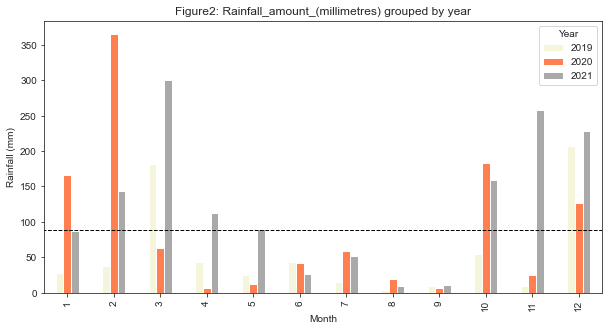

In [17]:
#Group data by month
data["Date"] = pd.to_datetime(data[["Year", "Month"]].assign(DAY=1))
data_month = data[['Date','Rainfall_amount_(millimetres)_Interpolate']].groupby('Date', sort=True).sum()
data_month[:10]

# Bar plot
sns.set_style("ticks")
rainfall_plot = data_pivot.drop(columns=['Average'])
rainfall_plot.plot(kind="bar", figsize=(10,5), title="Figure2: Rainfall_amount_(millimetres) grouped by year", xlabel="Month", ylabel="Rainfall (mm)",
               color=['beige', 'coral', 'darkgrey'])

plt.hlines((round(descr['Average'][1],2)),-1,12,colors="black", linewidth=1, label='mean',linestyle='dashed')


The plot illustrates the rainfall amount grouped by year and month, which allows compare months of last years in sequential time.
Furthermore, It has been added the mean (horizontal black line) found in table2 with a value of 89.07mm per year.

It can see certain pattern and to determine significant periods:

- Between April and September are approximately below of the mean, so they can be regarded the driest months of the year.
- Heavy rainfall period starts from october to March, with the biggest amount of rainfall between February and march. However, the media of rainfall found in Table1 indicates December is the greastest with a value of 187.87 in comparison to February and March with 182.67mm and 181.47mm, respectively.


Text(0.5, 1.0, 'Figure3: Average rainfall by month 2019-2020-2021')

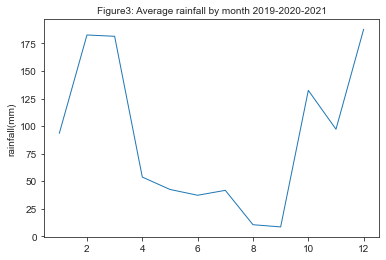

In [18]:
# Plot the monthly average of rainfall 
plt.plot(data_pivot["Average"], linewidth=1)
plt.ylabel('rainfall(mm)')
plt.title('Figure3: Average rainfall by month 2019-2020-2021',size=10)


This plot reveals the bigest amount in December in comparison to February and March. Moreover, the lowest amount of rainfall in September

**Decision about significant events**: Taking in consideration the tables elaborated and graphics illustrated, it has been regarded the following significant events to a posterior analysis with another Australian city.
- Analysis1: Data will be split into two semesters: between April and September and between October and March, driest and rainiest months, respectively.
- Analysis2: The analysis focuses on the driest and rainiest month previously determined by the mean in tables and plots:  September (mean) and December (mean), respectively.
- Analysis3: The last analysis focuses on August 2019 and February 2020 which were the driest and rainiest month througout this period time of three years.


**Upload Melbourne data Rainfall**

Melbourne city has been selected to compare amount of rainfall with Brisbane.

In [19]:
# Upload data
data_melbourne= pd.read_csv('Melbourne_Data.csv', )
data_melbourne.head(3)

# From our question, we need only the last three year (not 2022)
data_melbourne = data_melbourne[(data_melbourne.Year >= 2019) & (data_melbourne.Year < 2022)]
data_melbourne.head(3)

# Interpolate Rainfall amount for missing values
data_melbourne["Rainfall_amount_(millimetres)_Interpolate"] = data_melbourne["Rainfall amount (millimetres)"]
data_melbourne["Rainfall_amount_(millimetres)_Interpolate"].interpolate(method ='linear', inplace=True) 

# Taking only variables which will be analysed
variables = ["Year","Month","Day","Rainfall_amount_(millimetres)_Interpolate"]
data_melbourne = data_melbourne.filter(variables, axis=1)

# Rainfall by year and month
data_melbourne = data_melbourne.reset_index().pivot_table(index='Month', columns='Year', values='Rainfall_amount_(millimetres)_Interpolate', aggfunc=np.sum)

data_melbourne['Average']= round(data_melbourne[column_names].mean(axis=1),2)
data_melbourne

Year,2019,2020,2021,Average
Month,,,,
1,12.6,129.4,93.6,78.53
2,20.3,77.0,11.2,36.17
3,14.6,90.2,60.2,55.00
4,13.6,145.6,38.2,65.80
5,63.5,82.8,69.8,72.03
6,57.5,30.8,47.7,45.33
7,53.3,32.4,35.7,40.47
8,64.3,68.8,59.2,64.10
9,51.4,26.8,72.6,50.27


In [20]:
# Rename data_pivot as 'data_brisbane'
data_brisbane = data_pivot
data_brisbane

Year,2019,2020,2021,Average
Month,,,,
1,27.9,165.6,86.6,93.37
2,38.0,365.8,144.2,182.67
3,181.0,62.8,300.6,181.47
4,42.6,6.3,112.2,53.70
5,25.4,12.2,89.8,42.47
6,43.6,41.6,26.4,37.20
7,14.4,59.4,51.2,41.67
8,3.2,19.4,8.8,10.47
9,8.8,5.8,10.8,8.47


##### **Analysis1**: What difference can be seen when rainfall period is split in rainest and driest months according to Brisbane?

In [21]:
# According to the previous analysis in Brisbane city, it was identified: 
# rainest_months = from October to March
# driest_months = from April to Setember

## Split data by dry and rain months

apr_to_set_br = data_brisbane.query('Month == [4,5,6,7,8,9]')
apr_to_set_mel = data_melbourne.query('Month == [4,5,6,7,8,9]')

oct_to_march_br = data_brisbane.query('Month == [10,11,12,1,2,3]')
oct_to_march_mel = data_melbourne.query('Month == [10,11,12,1,2,3]')

In [22]:
# Obtain the average of amount rainfall between April and September and to convert into one dataframe
df_apr_to_set_br = pd.DataFrame(apr_to_set_br.mean()).rename(columns = {0:'apr_to_set_br'})
df_apr_to_set_mel = pd.DataFrame(apr_to_set_mel.mean()).rename(columns = {0:'apr_to_set_mel'})
apr_to_set_df = pd.merge(df_apr_to_set_br, df_apr_to_set_mel, on='Year')

# Drop 'average' row
#apr_to_set_df = apr_to_set_df.drop(index='Average')

round(apr_to_set_df,2)

,apr_to_set_br,apr_to_set_mel
Year,,
2019,23.00,50.60
2020,24.12,64.53
2021,49.87,53.87
Average,32.33,56.33


In [23]:
# Obtain the average of amount rainfall  between April and September and to convert into one dataframe
df_oct_to_march_br = pd.DataFrame(oct_to_march_br.mean()).rename(columns = {0:'oct_to_march_br'})
df_oct_to_march_mel = pd.DataFrame(oct_to_march_mel.mean()).rename(columns = {0:'oct_to_march_mel'})
df_oct_to_march_df = pd.merge(df_oct_to_march_br, df_oct_to_march_mel, on='Year')

# Drop 'average' row
#df_oct_to_march_df = df_oct_to_march_df.drop(index='Average')

round(df_oct_to_march_df,2)

,oct_to_march_br,oct_to_march_mel
Year,,
2019,86.55,23.40
2020,154.77,79.45
2021,196.13,67.38
Average,145.82,56.74


##### **Analysis2:** What difference there is from the driest and rainest month of Brisbane rainfall and Melbourne?

In [24]:
# Select driest and rainest months according to the mean of Brisbane: Setember and December, respectively.
set_br = data_brisbane.query('Month == [9]')
set_mel = data_melbourne.query('Month == [9]')

dec_br = data_brisbane.query('Month == [12]')
dec_mel = data_melbourne.query('Month == [12]')


In [25]:
# Rename index to concatenate both months: September
set_br = set_br.rename(index={9: 'set_br'})
set_mel = set_mel.rename(index={9: 'set_mel'})

# Concatenate
set_df = pd.concat([set_br, set_mel], axis=0)
set_df

Year,2019,2020,2021,Average
Month,,,,
set_br,8.8,5.8,10.8,8.47
set_mel,51.4,26.8,72.6,50.27


In [26]:
# Rename index to concatenate both months: December
dec_br = dec_br.rename(index={12: 'dec_br'})
dec_mel = dec_mel.rename(index={12: 'dec_mel'})

# Concatenate
dec_df = pd.concat([dec_br, dec_mel], axis=0)
dec_df

Year,2019,2020,2021,Average
Month,,,,
dec_br,207.8,127.2,228.6,187.87
dec_mel,4.4,42.6,22.6,23.20


##### **Analysis3:** What can be seen in the month of August 2019 and February 2020?

In [27]:
# Select driest and rainest month (by amount)

#Brisbane
aug2019_br = data_pivot.min().min()
feb2020_br = data_brisbane.max().max()

#Melbourne: it is need to identify the values of August 2019 and February 2020
aug2019_mel = data_melbourne.loc[data_melbourne.index == 2,2020].values[0]
feb2020__mel = data_melbourne.loc[data_melbourne.index == 8,2019].values[0]

print("Minimun rainfall in Brisbane througout 2019-2021 was in Auguts 2019: " + str(round((aug2019_br),2)) + " mm")
print("Minimun rainfall in Brisbane througout 2019-2021 was in February 2020: " + str(round((feb2020_br),2)) + " mm")

print("Rainfall in Melbourne Auguts 2019: " + str(round((aug2019_mel),2)) + " mm")
print("Rainfall in Melbourne February 2020: " + str(round((feb2020__mel),2)) + " mm")


Minimun rainfall in Brisbane througout 2019-2021 was in Auguts 2019: 3.2 mm
Minimun rainfall in Brisbane througout 2019-2021 was in February 2020: 365.8 mm
Rainfall in Melbourne Auguts 2019: 77.0 mm
Rainfall in Melbourne February 2020: 64.3 mm


In [28]:
#Create dataframe of rainfall August 2019 Brisbane and Melbourne
data = {'August_2019_Br':[aug2019_br], 'August_2019_Mel':[aug2019_mel]}
data_aug2019 = pd.DataFrame(data)
data_aug2019

,August_2019_Br,August_2019_Mel
0,3.2,77.0


In [29]:
#Create dataframe of rainfall February 2020 Brisbane and Melbourne
data = {'February_2020_Br':[feb2020_br], 'February_2020_Mel':[feb2020__mel]}
data_feb2020 = pd.DataFrame(data)
data_feb2020

,February_2020_Br,February_2020_Mel
0,365.8,64.3


### 4. Visualisation

##### **Visualisation:** Analysis 1

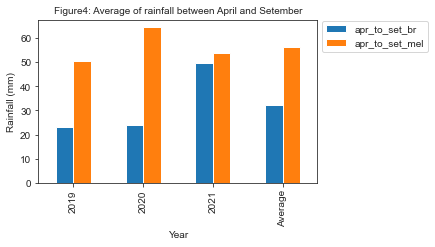

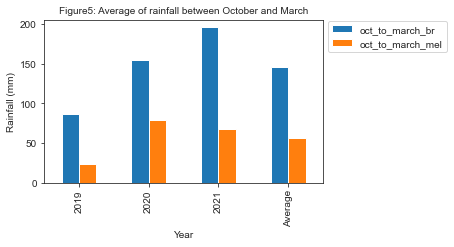

In [30]:
# Plot average of rainfall between April and September per each year
apr_to_set_df.plot(kind="bar", figsize=(5,3), ylabel="Rainfall (mm)")
plt.title("Figure4: Average of rainfall between April and Setember",size=10)
plt.legend(bbox_to_anchor=(1.0, 1.02))

# Plot average of rainfall between October and March per each year
df_oct_to_march_df.plot(kind="bar", figsize=(5,3), ylabel="Rainfall (mm)")
plt.title("Figure5: Average of rainfall between October and March", size=10)
plt.legend(bbox_to_anchor=(1.0, 1.02))

plt.show()

##### **Visualisation:** Analysis 2

In [31]:
# Visualising Rainfall in the months of September
set_df

Year,2019,2020,2021,Average
Month,,,,
set_br,8.8,5.8,10.8,8.47
set_mel,51.4,26.8,72.6,50.27


In [32]:
# Change columns by rows
x = set_df.loc['set_br']
y = set_df.loc['set_mel']
set_df2 = pd.concat([x, y], axis=1)
set_df2

,set_br,set_mel
Year,,
2019,8.80,51.40
2020,5.80,26.80
2021,10.80,72.60
Average,8.47,50.27


In [33]:
# Visualising Rainfall in the month of December
dec_df

Year,2019,2020,2021,Average
Month,,,,
dec_br,207.8,127.2,228.6,187.87
dec_mel,4.4,42.6,22.6,23.20


In [34]:
# Change columns by rows
x = dec_df.loc['dec_br']
y = dec_df.loc['dec_mel']
dec_df2 = pd.concat([x, y], axis=1)
dec_df2

,dec_br,dec_mel
Year,,
2019,207.80,4.4
2020,127.20,42.6
2021,228.60,22.6
Average,187.87,23.2


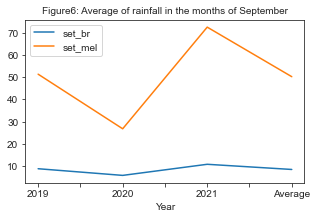

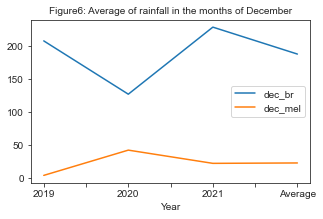

In [35]:
# Line plot showing amount rainfall in the month of September

set_df2.reset_index(inplace=True) # Reset index to plot column 'Year'
set_df2.plot(x='Year', y=["set_br", "set_mel"], kind="line", figsize=(5, 3),)
plt.title("Figure6: Average of rainfall in the months of September",size=10)

# Line plot showing amount rainfall in the month of September

dec_df2.reset_index(inplace=True) # Reset index to plot column 'Year'
dec_df2.plot(x='Year', y=["dec_br", "dec_mel"], kind="line", figsize=(5, 3))
plt.title("Figure6: Average of rainfall in the months of December",size=10)

plt.show()

##### **Visualisation:** Analysis 3

In [36]:
data_aug2019

,August_2019_Br,August_2019_Mel
0,3.2,77.0


In [37]:
data_feb2020

,February_2020_Br,February_2020_Mel
0,365.8,64.3


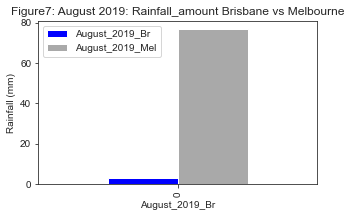

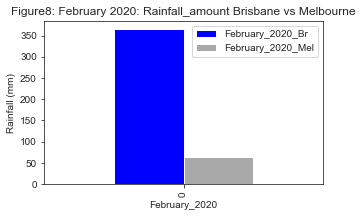

In [38]:
# Bar plot August 2019
data_aug2019.plot(kind="bar", figsize=(5,3), title="Figure7: August 2019: Rainfall_amount Brisbane vs Melbourne", xlabel="August_2019_Br", ylabel="Rainfall (mm)",
               color=['blue', 'darkgrey'])

# Bar plot February 2020
data_feb2020.plot(kind="bar", figsize=(5,3), title="Figure8: February 2020: Rainfall_amount Brisbane vs Melbourne", xlabel="February_2020", ylabel="Rainfall (mm)",
               color=['blue', 'darkgrey'])

plt.show()

### 5. Insight

- It can be inferred that Brisbane and Melbourne are inversely proportional. 
- The periods of rainfall in Brisbane are more predominant and extreme than Melbourne.
- During extreme time of rainfall and dry in Brisbane, Melboune keeps a normal rainfall time.
- December can be deemed the rainiest month in Brisbane according to the mean, however, longer and stronger rainfall can be caused on February